# 구글 플레이 스토어 데이터

## Column 설명
- Rating : 앱의 평점
- App : 앱 이름
- Category : 앱이 속한 카테고리
- Reviews : 리뷰의 개수
- Size : 앱의 크기
- Installs : 설치된 횟수
- Type : 유료 또는 무료(Paid or Free)
- Price : 앱의 가격(무료인 경우 0)
- Content Rating : 앱의 나이 등급
- Genres : 앱의 장르, 여러 값을 가질 수 있음
- Last Updated : 마지막으로 업데이트 된 날
- Current Ver : 앱의 현재 버전
Genres : 앱의 장르, 여러 값을 가질 수 있음
- Last Updated : 마지막으로 업데이트 된 날
- Current Ver : 앱의 현재 버전
- Android Ver : 요구되는 안드로이드 최소 버전

In [1]:
df = pd.read_csv("./googleplaystore.csv", parse_dates=["Last Updated"])
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


## 목표

Rating에 영향을 주는 변수 3개 찾아서 시각화해보기

In [2]:
df.dtypes

Rating                   float64
App                       object
Category                  object
Reviews                    int64
Size                      object
Installs                  object
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [3]:
df.size

140920

In [4]:
df.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

## 1. Rating 값이 NaN인 데이터 드랍하기
  - 예측 목표가 Rating인데 이 값이 NaN인 데이터를 어떻게 채워서 쓰기 힘들다고 생각함
  - 데이터 크기의 1% 정도라 드랍해도 괜찮을 것 같음

In [5]:
df.dropna(subset=["Rating"], inplace=True)
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [6]:
df.isnull().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

## 2. 실제로는 숫자이지만 dtype이 문자인 데이터 숫자로 바꾸기

"Size"와 "Installs", "Price"가 해당 대상이다.  

In [7]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

뒤에 붙는 +를 제거하고 int형으로 바꾸기

In [8]:
def installs_to_num(s):
    return int(s.replace(",", "").replace("+", ""))

df["Installs"] = df["Installs"].apply(installs_to_num)
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [9]:
df.Price.unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$7.99 ', '$5.99 ', '$2.99 ',
       '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ', '$9.00 ',
       '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ', '$16.99 ',
       '$14.99 ', '$29.99 ', '$12.99 ', '$2.49 ', '$10.99 ', '$1.50 ',
       '$19.99 ', '$15.99 ', '$33.99 ', '$39.99 ', '$3.95 ', '$4.49 ',
       '$1.70 ', '$8.99 ', '$1.49 ', '$3.88 ', '$399.99 ', '$17.99 ',
       '$400.00 ', '$3.02 ', '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ',
       '$2.50 ', '$1.59 ', '$6.49 ', '$1.29 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$8.49 ', '$1.75 ', '$14.00 ',
       '$2.00 ', '$3.08 ', '$2.59 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$13.99 ', '$4.29 ', '$3.28 ', '$4.60 ',
       '$1.00 ', '$2.95 ', '$2.90 ', '$1.97 ', '$2.56 ', '$1.20 '],
      dtype=object)

마찬가지로 앞의 $를 제거하고 float형으로 바꿔준다.

In [10]:
def price_to_num(s):
    return float(s[1:]) if s.startswith("$") else float(s)

df["Price"] = df["Price"].map(price_to_num)
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [11]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

단위가 M인 데이터는 1000을 곱하고, k인 데이터는 그대로 float로 변환해서 단위를 k로 통일한다.  
"Varies with device"는 NaN으로 지정했다.

In [12]:
def size_to_num(s):
    if s.endswith("M"):
        return float(s[:-1]) * 1000
    elif s.endswith("k"):
        return float(s[:-1])
    else:
        return np.nan

df["Size"] = df["Size"].map(size_to_num)
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [13]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,0.083734,0.051355,-0.021903
Reviews,0.068141,1.000000,0.240414,0.641612,-0.009820
Size,0.083734,0.240414,1.000000,0.162759,-0.026240
Installs,0.051355,0.641612,0.162759,1.000000,-0.011890
Price,-0.021903,-0.009820,-0.026240,-0.011890,1.000000


이렇게 변환해준 수치형 데이터와 평점은 큰 상관관계가 없어보인다.

## 3. "Reviews", "Size", "Installs", "Price", "Type"에 대해 각각 Rating과의 그래프 그려보기

### 3-1. "Reviews" vs "Rating"

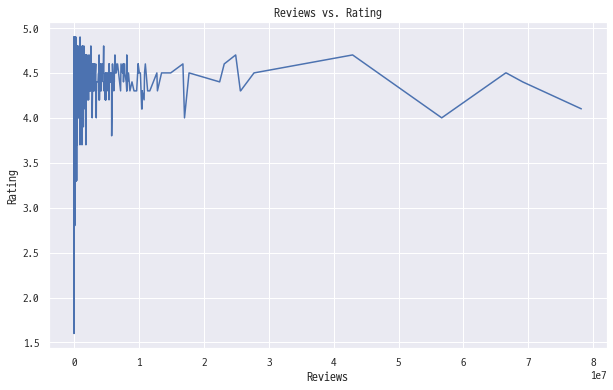

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Reviews", y="Rating", data=df)

plt.title("Reviews vs. Rating")
plt.show()

### 3-2. "Size" vs. "Rating"

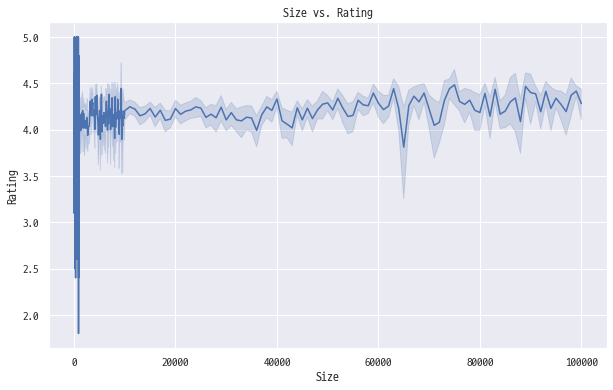

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Size", y="Rating", data=df)

plt.title("Size vs. Rating")
plt.show()

### 3-3. "Installs" vs. "Rating"

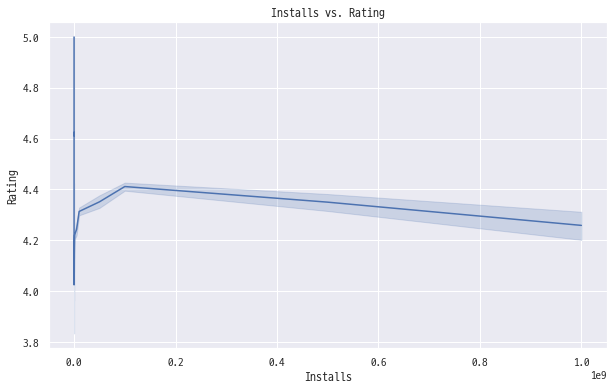

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Installs", y="Rating", data=df)

plt.title("Installs vs. Rating")
plt.show()

### 3-4. "Price", "Type" vs "Rating"

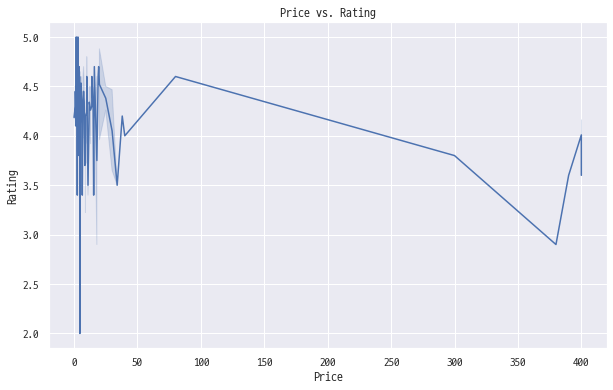

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Price", y="Rating", data=df)

plt.title("Price vs. Rating")
plt.show()

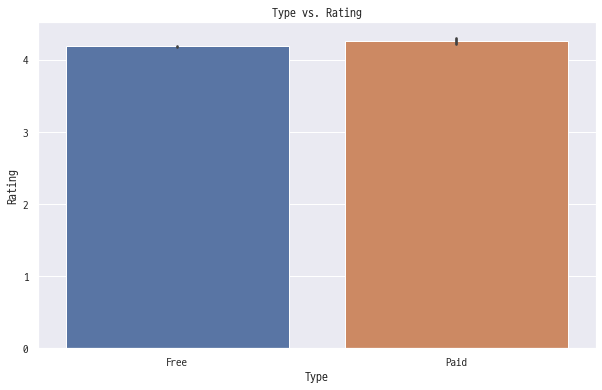

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Type", y="Rating", data=df)

plt.title("Type vs. Rating")
plt.show()

전반적으로 매우 약한 상관관계를 보이거나, 상관관계가 딱히 없는 것으로 보인다.

## 4. 나머지 다른 변수와 "Rating"의 관계 살펴보기

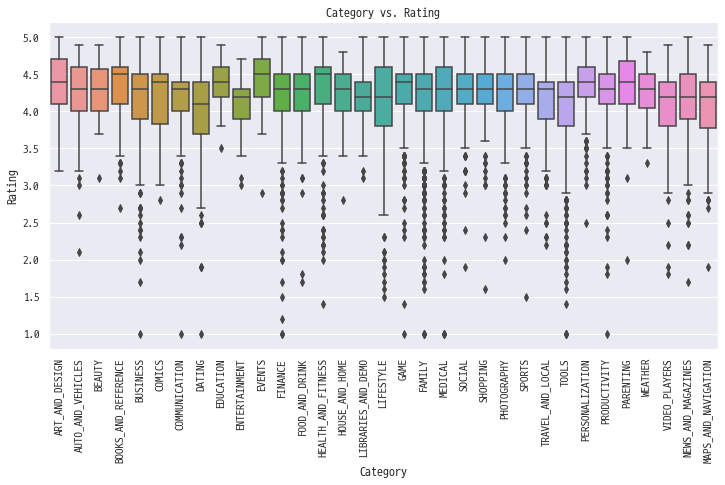

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Category", y="Rating", data=df)

plt.xticks(rotation=90)
plt.title("Category vs. Rating")
plt.show()

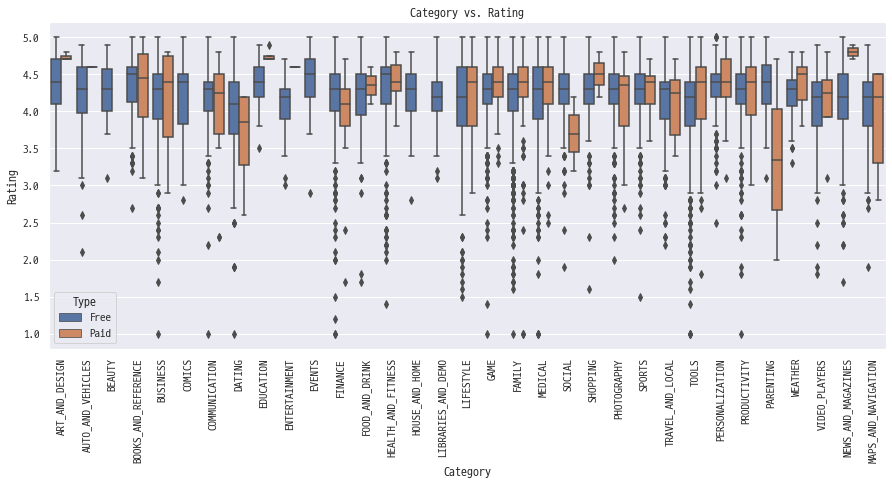

In [20]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="Category", y="Rating", hue="Type", data=df)

plt.xticks(rotation=90)
plt.title("Category vs. Rating")
plt.show()

# 노선 변경

Category vs. Rating 그래프를 그리고 든 생각인데, 사실 Rating은 다 고만고만한 것 같다.  
내 실력으로 여기서 의미를 찾기 힘들 것 같다는 생각이 들어  
대신 목표변수를 Installs로 바꿔보기로 했다.  

### 1. Rating vs. Installs

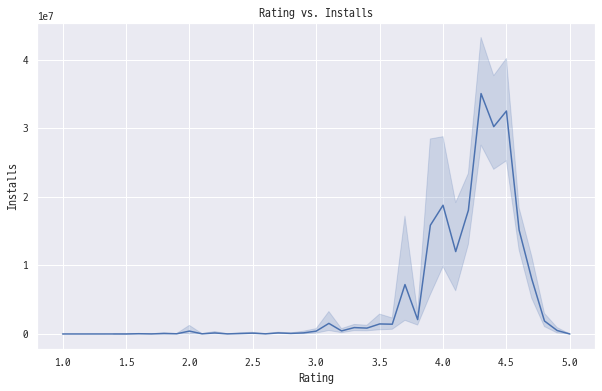

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Rating", y="Installs", data=df)

plt.title("Rating vs. Installs")
plt.show()

Rating이 거의 다 4.0 ~ 4.5라서 데이터가 저기 몰려있다.  
높은 설치수를 자랑하는 앱의 평점은 거의 다 4.0 ~ 4.5라는 것을 알 수 있다.

### 2. Size vs. Installs

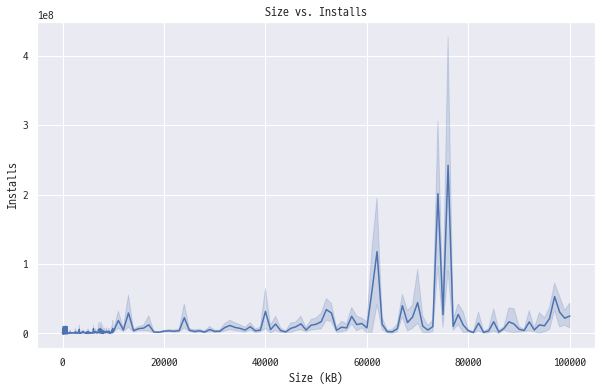

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Size", y="Installs", data=df)

plt.title("Size vs. Installs")
plt.xlabel("Size (kB)")
plt.show()

설치된 횟수가 높은 앱의 크기가 마침 저 크기였다고 보는게 맞는 것 같다.

### 3. Type vs Installs

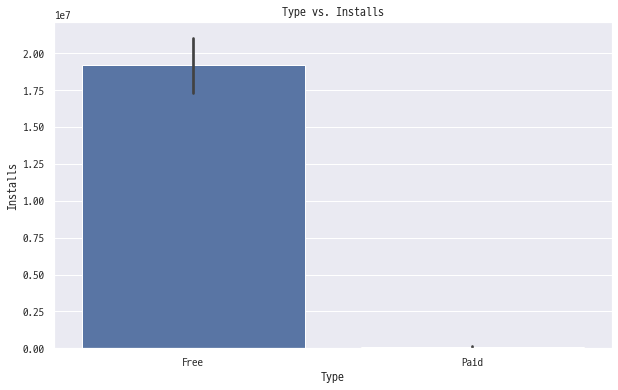

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Type", y="Installs", data=df)

plt.title("Type vs. Installs")
plt.show()

일단 무료로 만드는 데에는 이유가 있다.

### 4. Category vs. Installs

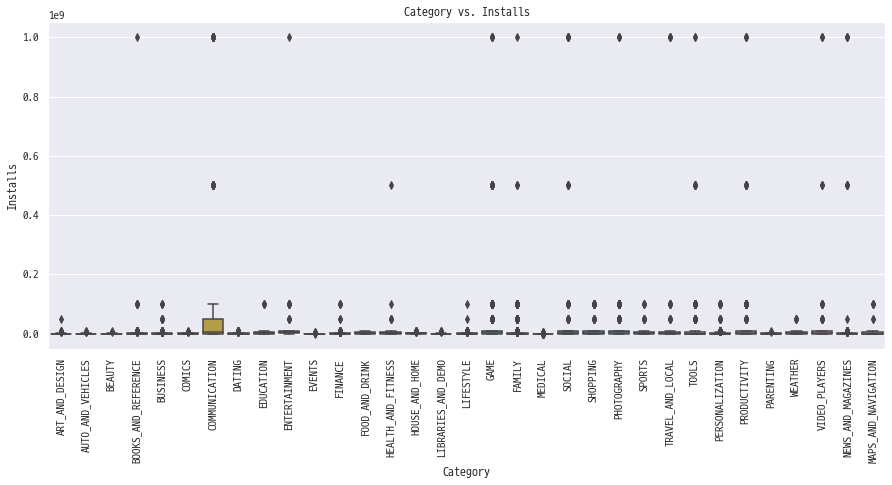

In [36]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="Category", y="Installs", data=df)

plt.xticks(rotation=90)
plt.title("Category vs. Installs")
plt.show()

거의 대부분 앱의 설치 횟수가 바닥이어서 그래프가 이렇게 나온다.  
설치 횟수가 평균 이상인 데이터만 모아서 그래프를 그리면 다르지 않을까 생각이 들었다.

In [58]:
df_overmean = df[df["Installs"] >= df["Installs"].mean()]
df_overmean.size

10764

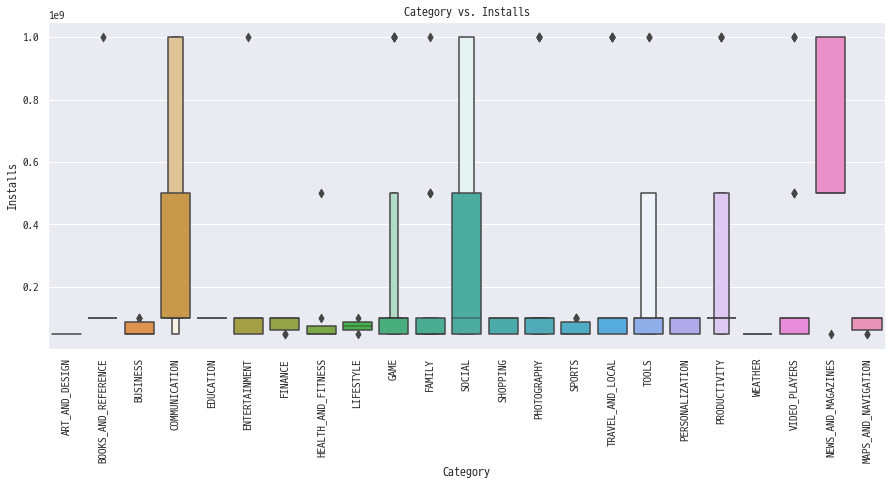

In [59]:
plt.figure(figsize=(15, 6))
sns.boxenplot(x="Category", y="Installs", data=df_overmean)

plt.xticks(rotation=90)
plt.title("Category vs. Installs")
plt.show()

특별히 인기있는 몇몇 카테고리를 확인할 수 있다.

In [60]:
df.head(2)

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


### 5. Content Rating vs. Installs

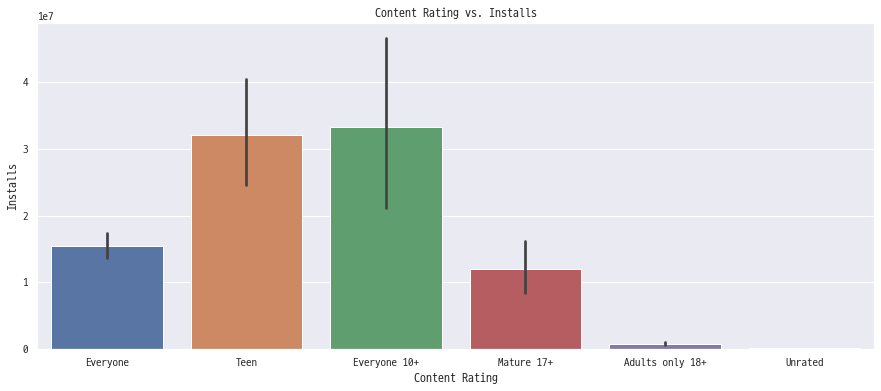

In [66]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Content Rating", y="Installs", data=df)

plt.title("Content Rating vs. Installs")
plt.show()

Teen과 Everyone 10+가 특별히 높다는 것을 알 수 있다.

### 6. Last Updated vs. Installs
  
가정 : 마지막 업데이트일이 가까울 수록 꾸준히 관리되고 있는 앱이라는 뜻이다.  
그러니 마지막 업데이트일이 가까울 수록 설치횟수가 높을 것이다.

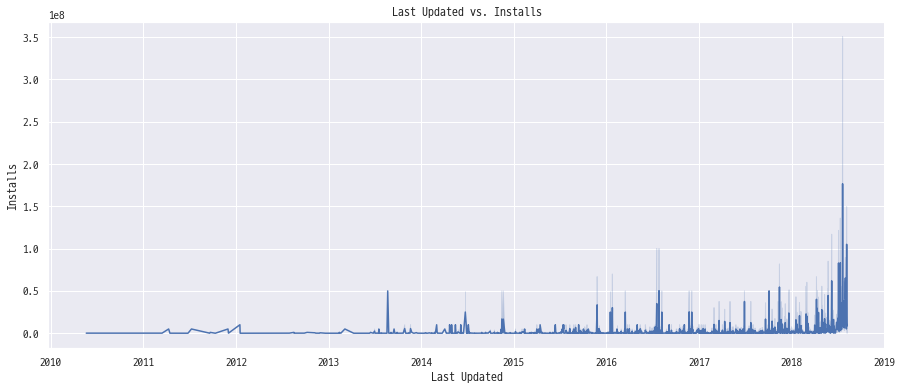

In [67]:
plt.figure(figsize=(15, 6))
sns.lineplot(x="Last Updated", y="Installs", data=df)

plt.title("Last Updated vs. Installs")
plt.show()

가정이 맞는 것 같다.

# - 끝 -

## 아쉬웠던 점
  
1. Genres 열은 하나의 행이 여러 개의 속성을 가질 수 있는데,  
이걸 나눠서 분석하는 게 어려워서 해내지 못했습니다. 

2. 과제의 의도가 이렇게 하는게 맞는지 모르겠습니다.  
데이터를 나눠서 살펴보긴 했는데, 이게 과제의 의도였는 지, 아니면 분석을 제대로 하기는 했는지에 대한 확신이 없습니다.